In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(filepath_or_buffer='AAPL.dat',
                 index_col='Date', parse_dates=True)

df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0
2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0
2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0
2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0
2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0


In [2]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0
2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0
2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0
2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0
2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0


In [3]:
df2 = df.sort_values(by='Date', ascending=True)
df2.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0


In [4]:
df2['30d mavg'] = df2['AdjClose'].rolling(window=21).mean()
df2['30d std'] = df2['AdjClose'].rolling(window=21).std()
df2['Upper Band'] = df2['30d mavg'] + (df2['30d std'] * 2)
df2['Lower Band'] = df2['30d mavg'] - (df2['30d std'] * 2)

<AxesSubplot:xlabel='Date'>

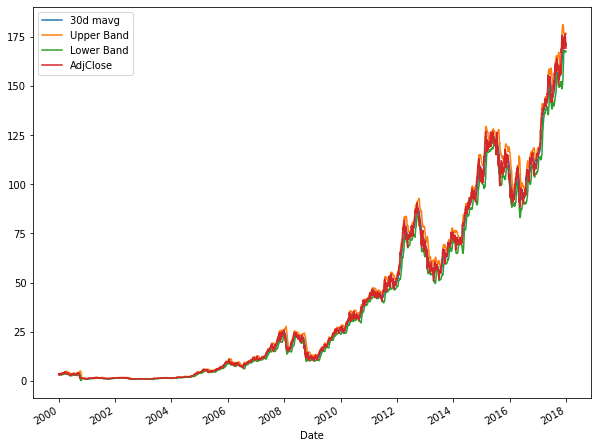

In [6]:
cols = ['30d mavg', 'Upper Band', 'Lower Band', 'AdjClose']
df2[cols].plot(figsize=(10,8))

<AxesSubplot:xlabel='Date'>

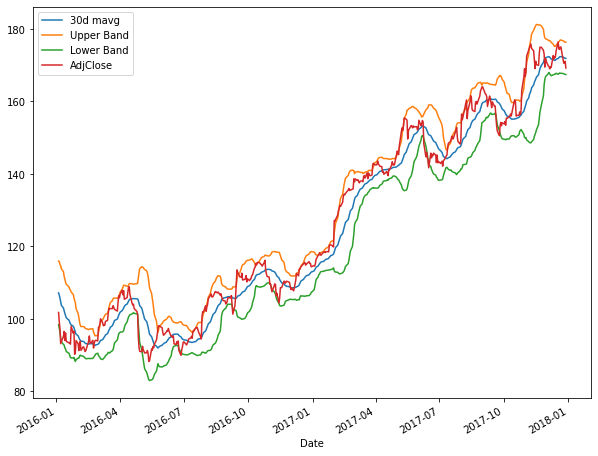

In [7]:
df2['2016':][cols].plot(figsize=(10,8))

No handles with labels found to put in legend.


[]

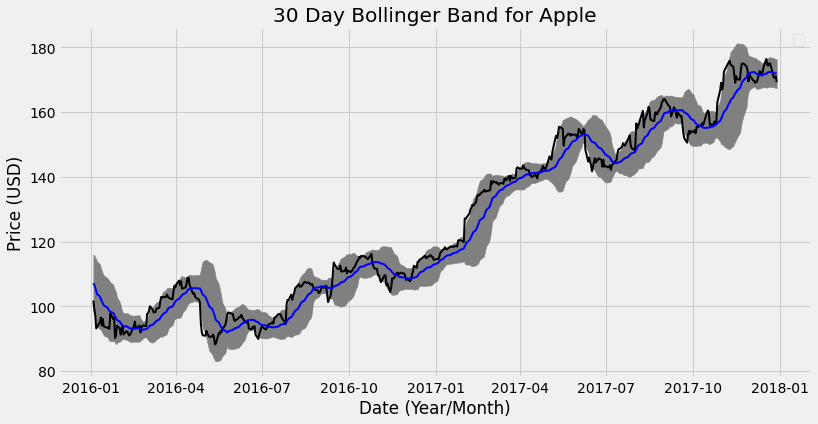

In [9]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

x_axis = df2['2016':].index.get_level_values(0)

ax.fill_between(x_axis, df2['2016':]['Upper Band'],
                df2['2016':]['Lower Band'], color='grey')

ax.plot(x_axis, df2['2016':]['AdjClose'], color='black', lw=2)
ax.plot(x_axis, df2['2016':]['30d mavg'], color='blue', lw=2)

ax.set_title('30 Day Bollinger Band for Apple')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price (USD)')
ax.legend()
ax.plot()

In [15]:
def plotBollBand(file, securityName, attribute='AdjClose',
                window=21, start=None, end=None):
    
    df = pd.read_csv(filepath_or_buffer = file, index_col='Date',
                     parse_dates=True)
    
    df = df.sort_values(by='Date', ascending=True)
    
    mavgCol = str(window) + 'd mvag'
    stdCol = str(window) + 'd std'
    
    df[mavgCol] = df[attribute].rolling(window=window).mean()
    df[stdCol] = df[attribute].rolling(window=window).std()
    df['Upper Band'] = df[mavgCol] + (df[stdCol] * 2)
    df['Lower Band'] = df[mavgCol] - (df[stdCol] * 2)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    
    x_axis = df[start:end].index.get_level_values(0)
    ax.fill_between(x_axis, df[start:end]['Upper Band'],
                            df[start:end]['Lower Band'], color='grey')
    ax.plot(x_axis, df[start:end][attribute], color='black', lw=2)
    ax.plot(x_axis, df[start:end][mavgCol], color='blue', lw=2)
    
    title = str(window) + ' Day Bollinger Band For ' + securityName
    ax.set_title(title)
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price (USD)')
    plt.show()

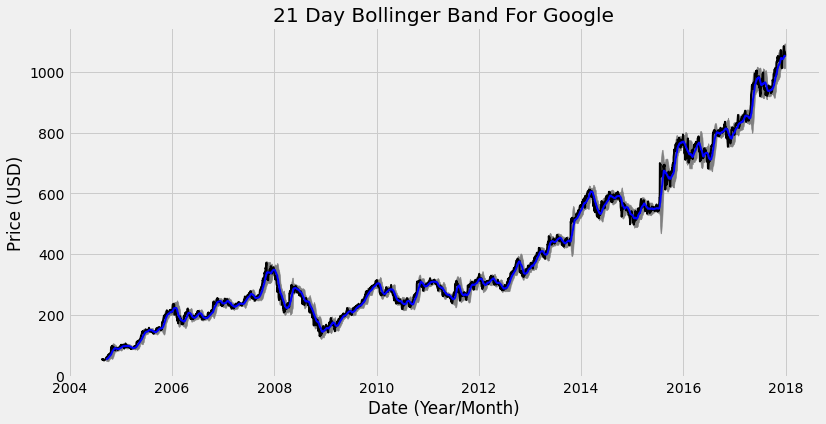

In [16]:
plotBollBand(file='GOOGL.dat', securityName='Google')

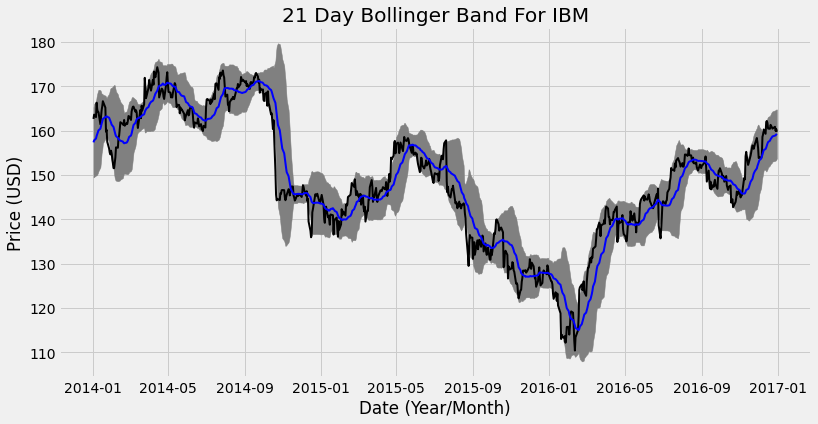

In [17]:
plotBollBand(file='IBM.dat', securityName='IBM', start='2014', end='2016')


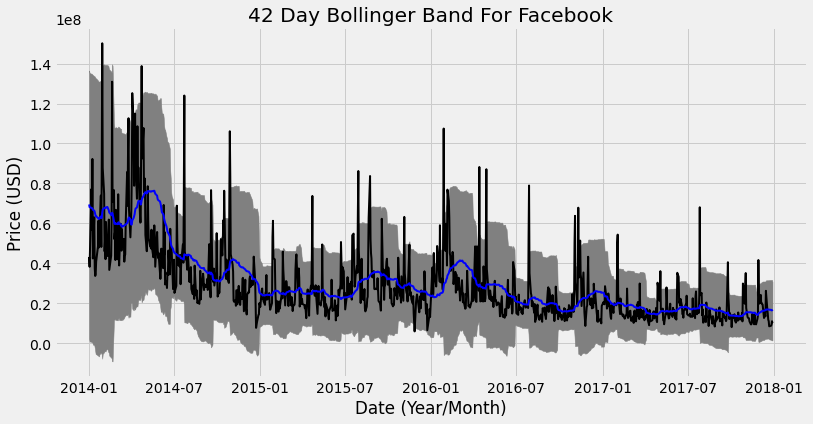

In [19]:
plotBollBand(file='FB.dat', securityName='Facebook', 
             start='2014', window=42, attribute='AdjVolume')